## How can we increase the unit price for specific products to maximize revenue without sacrificing customer satisfaction ?

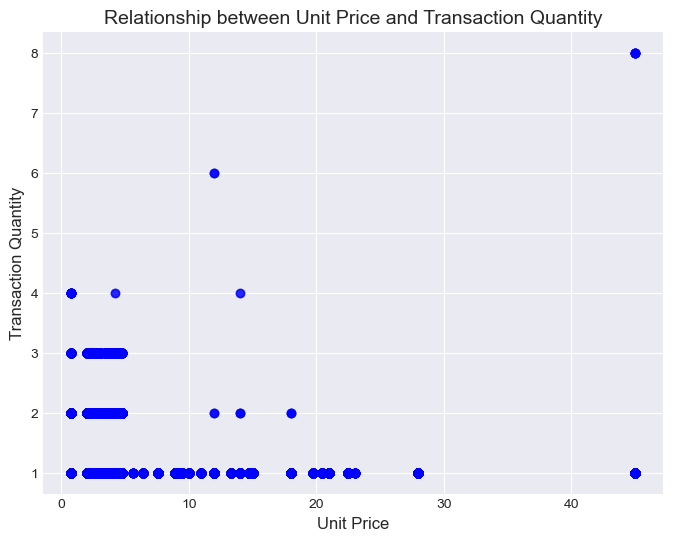

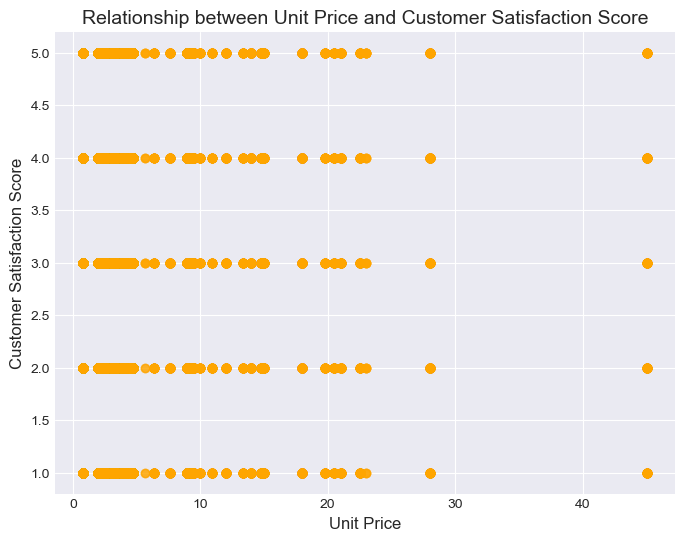

   Transaction ID Transaction Date Transaction Time  Store ID  \
0               1       2023-01-01             7:06         5   
1               2       2023-01-01             7:08         5   
2               3       2023-01-01             7:14         5   
3               4       2023-01-01             7:20         5   
4               5       2023-01-01             7:22         5   

    Store Location  Product ID  Unit Price  Transaction Quantity  \
0  Lower Manhattan          32         3.0                     2   
1  Lower Manhattan          57         3.1                     2   
2  Lower Manhattan          59         4.5                     2   
3  Lower Manhattan          22         2.0                     1   
4  Lower Manhattan          57         3.1                     2   

     Product Category           Product Type               Product Detail  \
0              Coffee  Gourmet brewed coffee                  Ethiopia Rg   
1                 Tea        Brewed Chai tea  

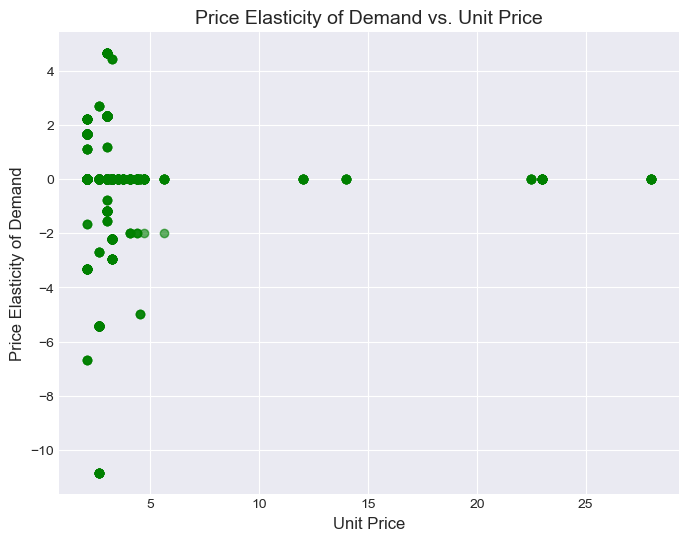

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv("Coffee_Shop_Sales_Dataset.csv")  # Replace "your_dataset.csv" with the actual file path

# Analyze relationship between unit price and transaction quantity
plt.figure(figsize=(8, 6))
plt.scatter(df['Unit Price'], df['Transaction Quantity'], color='blue', alpha=0.6)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Transaction Quantity', fontsize=12)
plt.title('Relationship between Unit Price and Transaction Quantity', fontsize=14)
plt.show()

# Analyze relationship between unit price and customer satisfaction score
plt.figure(figsize=(8, 6))
plt.scatter(df['Unit Price'], df['Customer Satisfaction Score'], color='orange', alpha=0.6)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Customer Satisfaction Score', fontsize=12)
plt.title('Relationship between Unit Price and Customer Satisfaction Score', fontsize=14)
plt.show()

# Basic data exploration
print(df.head())

# Calculate Price Elasticity of Demand (PED) if historical price and quantity data is available
# PED = (% Change in Quantity Demanded) / (% Change in Price)
# Calculate percentage change in quantity demanded
df['QuantityChange'] = df.groupby('Product ID')['Transaction Quantity'].pct_change()
# Calculate percentage change in price (assuming historical price data is available)
df['PriceChange'] = df.groupby('Product ID')['Unit Price'].pct_change()
# Calculate Price Elasticity of Demand
df['PED'] = df['QuantityChange'] / df['PriceChange']

# Demand Forecasting
# You can use time series forecasting methods (e.g., ARIMA, exponential smoothing) to forecast product demand

# Segment products based on demand levels
df['DemandSegment'] = pd.cut(df['Product Demand'], bins=[0, 1000, 5000, float('inf')], labels=['Low', 'Medium', 'High'])

# Optimal Pricing Strategies
# Analyze relationship between unit price, product demand, and customer satisfaction
# You can use regression analysis or other statistical methods to identify optimal pricing strategies

# Visualize findings
# You can create visualizations based on the calculated metrics (e.g., Price Elasticity of Demand, demand segments) to gain insights

# For example, plot Price Elasticity of Demand
plt.figure(figsize=(8, 6))
plt.scatter(df['Unit Price'], df['PED'], color='green', alpha=0.6)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Price Elasticity of Demand', fontsize=12)
plt.title('Price Elasticity of Demand vs. Unit Price', fontsize=14)
plt.show()

## How can we optimize product assortment in each store to maximize customer satisfaction and revenue?

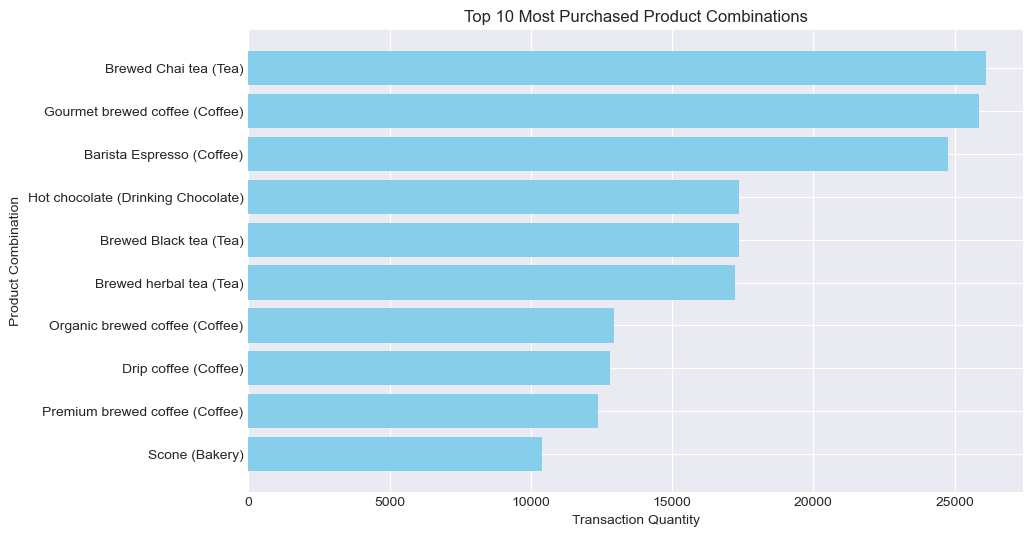

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Coffee_Shop_Sales_Dataset.csv")  # Replace "your_dataset.csv" with the actual file path

# Group by Product Category and Product Type, summing up Transaction Quantity
product_combinations = df.groupby(['Product Category', 'Product Type'])['Transaction Quantity'].sum().reset_index()

# Sort by Transaction Quantity in descending order
product_combinations = product_combinations.sort_values(by='Transaction Quantity', ascending=False)

# Visualize the top 10 combinations
plt.figure(figsize=(10, 6))
top_combinations = product_combinations.head(10)
plt.barh(top_combinations['Product Type'] + ' (' + top_combinations['Product Category'] + ')',
         top_combinations['Transaction Quantity'], color='skyblue')
plt.xlabel('Transaction Quantity')
plt.ylabel('Product Combination')
plt.title('Top 10 Most Purchased Product Combinations')
plt.gca().invert_yaxis()  # Invert y-axis to show the most purchased combination on top
plt.show()